In [1]:
import sys
sys.path.append('../..')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Convergence speed comparison according to Minimal Counts parameter

The Minimal counts Strategy depends on a meta-parameter. We will here compare the convergence status (defined by the information theoretic measure introduced in the paper) against this parameter, at different times.

In [2]:
from lib import ngdb
import numpy as np
from additional import custom_graph
import seaborn as sns

In [3]:
db=ngdb.NamingGamesDB("mincounts_parameter.db")

Here the configuration depends on the parameter:

In [4]:
def xp_cfg(i):
    return {
    'pop_cfg':{
        'voc_cfg':{
            'voc_type':'sparse_matrix',
            'M':20,
            'W':20
            },
        'strat_cfg':{
            'strat_type':'mincounts',
            'mincounts':i
            },
        'interact_cfg':{
            'interact_type':'speakerschoice'
            },
        'nbagent':20
        },
    'step':500
    }

In [5]:
nb_iter = 8
values = [0,1]+list(np.linspace(2,40,20))
#Tmax = [500, 1000, 2000, 10000]
Tmax = [500, 1000, 2000, 5000, 10000]
measure = 'entropycouples_norm'

We generate a dict object of experiments

In [6]:
exp_dict = {}
for v in values:
    exp_dict[v]=[]
    uuid_list=[]
    for i in range(nb_iter):
        tempexp = db.get_experiment(blacklist=uuid_list, tmax=Tmax[-1], **xp_cfg(v))
        exp_dict[v].append(tempexp)
        uuid_list.append(tempexp.uuid)

We define the procedure to graph what we want, and test it for the first value of T:

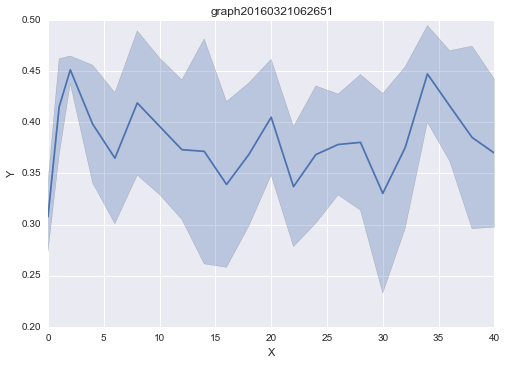

In [7]:
def get_graph(T):
    Ytemp = []
    stdtemp = []
    ind = 0
    Ttemp=[0]
    for v in values:
        templist = []
        for i in range(nb_iter):
            tempexp = exp_dict[v][i]
            tempexp.continue_exp_until(T)
            if ind == 0:
                Ttemp = exp_dict[values[0]][0]._T
                while T > Ttemp[ind]:
                    ind+=1
            templist.append(tempexp.graph(measure)._Y[0][ind])
        Ytemp.append(np.mean(templist))
        stdtemp.append(np.std(templist))
    return custom_graph.CustomGraph(values, Ytemp, stdvec=stdtemp)

graph = get_graph(Tmax[0])
graph.std = 1
graph.show()

We then graph the other values, combine them to the previous graph, and plot everything:

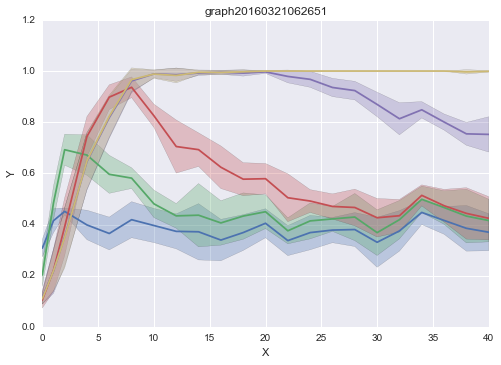

In [8]:
for T in Tmax[1:]: 
    graph.add_graph(get_graph(T))
graph.show()

In [9]:
graph._Y = list(reversed(graph._Y)) # Execute just once. This is for presentation style only (see effect on legend).
graph.stdvec = list(reversed(graph.stdvec))
Tmax = list(reversed(Tmax))

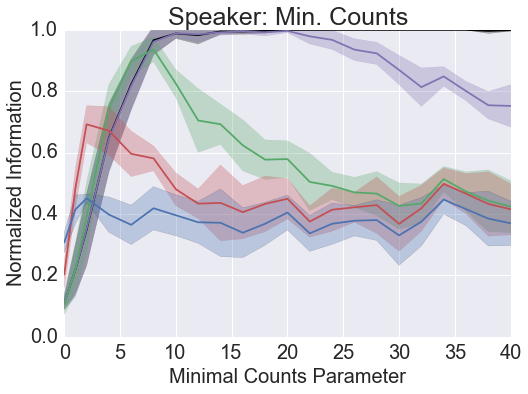

In [10]:
graph.title = ''
graph.xlabel = 'Minimal Counts Parameter'
graph.ylabel = 'Normalized Information'
graph.ymin = [1,0]
graph.ymax = [1,1]
graph.xmin = [1,0]
graph.xmax = [1,40]

for i in range(len(graph.Yoptions)):
    graph.Yoptions[i] = {'label':'T={}'.format(str(Tmax[i]))}
    
graph.Yoptions[0]['color'] = 'black'
graph.Yoptions[1]['color'] = sns.color_palette()[3]
graph.Yoptions[2]['color'] = sns.color_palette()[1]
graph.Yoptions[3]['color'] = sns.color_palette()[2]
#graph.Yoptions[4]['color'] = sns.color_palette()[0]
    
graph.legendoptions['bbox_to_anchor'] = (0,0,0.5,1)

graph.title = "Speaker: Min. Counts"

fontsize = 20
matplotlib.rcParams['font.size'] = fontsize
matplotlib.rcParams['xtick.labelsize'] = fontsize
matplotlib.rcParams['ytick.labelsize'] = fontsize
matplotlib.rcParams['axes.titlesize'] = fontsize+5
matplotlib.rcParams['axes.labelsize'] = fontsize
matplotlib.rcParams['legend.fontsize'] = fontsize
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 8,5.5

graph.show()

Convergence speed comparison according to threshold parameter, for the success-threshold strategy. The previously selected value of 90\% is well-chosen. $M$=$W$=$N$=20, 8 iterations. Time unit is number of past interactions.